In [42]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

df = pd.read_csv('NationalNames.csv')
df.head(n=1)

df.isnull().any()

df.groupby(['Name'])['Count'].sum().sort_values(ascending=False).head(n=1)

Name
James    5129096
Name: Count, dtype: int64

In [107]:
name_to_ratio = {}

for name, row in df[df['Year'] == 1945].groupby(["Name", "Gender"], as_index=False).sum().groupby(["Name"]):
    if len(row) == 2:
        female, male = row.iloc[0, :], row.iloc[1, :]
        name_to_ratio[female["Name"]] = np.abs(1 - 1. * female['Count'] / male['Count'])

names = sorted(name_to_ratio, key=name_to_ratio.get, reverse=False)

names[:10]

['Delane',
 'Salome',
 'Le',
 'Ottie',
 'Fayette',
 'Orrie',
 'Vertis',
 'Massie',
 'Artie',
 'Donie']

In [101]:
top_10_all = df.groupby(['Name'])['Count'].sum().sort_values(ascending=False)[:10]
top_10_female = df[df['Gender'] == 'F'].groupby(['Name'])['Count'].sum().sort_values(ascending=False)[:10]
top_10_male = df[df['Gender'] == 'M'].groupby(['Name'])['Count'].sum().sort_values(ascending=False)[:10]

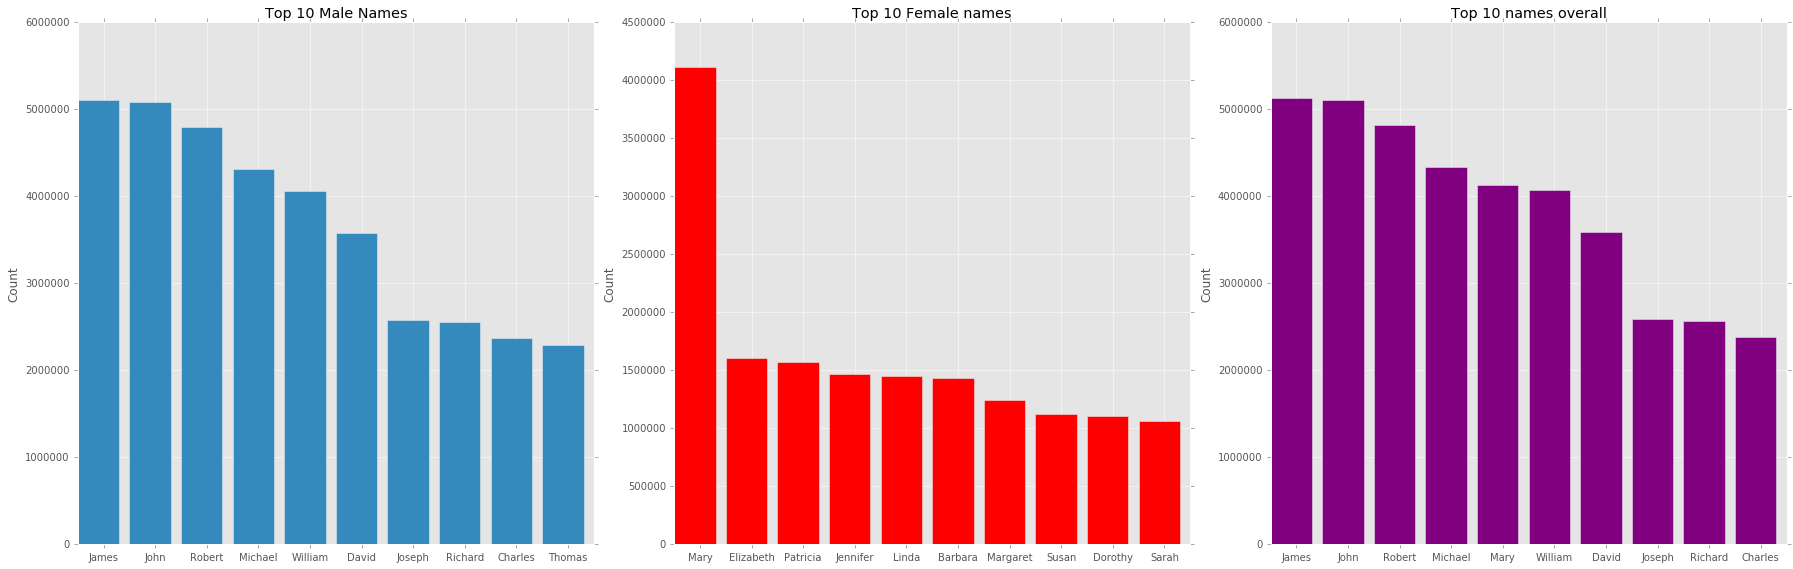

In [108]:
fig = plt.figure(figsize=(25, 8))

ax1 = fig.add_subplot(1, 3, 1)
ax1.bar(xrange(10), top_10_male.values)
ax1.set_xticks(np.arange(0.5, 10.5, 1))
ax1.set_xticklabels(top_10_male.index)
ax1.set_title('Top 10 Male Names')
ax1.set_ylabel('Count')

ax2 = fig.add_subplot(1, 3, 2)
ax2.bar(xrange(10), top_10_female.values, color='r')
ax2.set_xticks(np.arange(0.5, 10.5, 1))
ax2.set_xticklabels(top_10_female.index)
ax2.set_title('Top 10 Female names')
ax2.set_ylabel('Count')

ax3 = fig.add_subplot(1, 3, 3)
ax3.bar(xrange(10), top_10_all.values, color='purple')
ax3.set_xticks(np.arange(0.5, 10.5, 1))
ax3.set_xticklabels(top_10_all.index)
ax3.set_title('Top 10 names overall')
ax3.set_ylabel('Count')

fig.tight_layout()

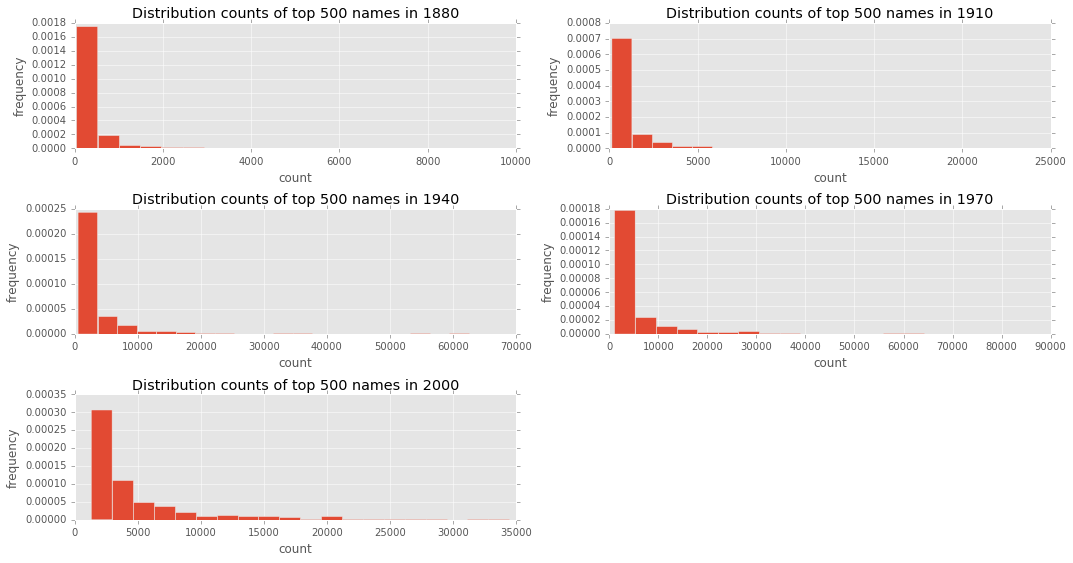

In [98]:
fig = plt.figure(figsize=(15, 10))

def generate_name_distribution_hist(year, ax):
    data = df[df['Year'] == year].sort_values('Count', ascending=False)['Count'].values[:500]
    
    ax.hist(data, bins=20, normed=True)
    ax.set_title('Distribution counts of top 500 names in %d' % year)
    ax.set_ylabel('frequency')
    ax.set_xlabel('count')
    
count = 1

for year in xrange(1880, 2020, 30):
    ax = fig.add_subplot(4, 2, count)
    generate_name_distribution_hist(year, ax)
    count = count + 1

fig.tight_layout()

/Users/rankine/anaconda3/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


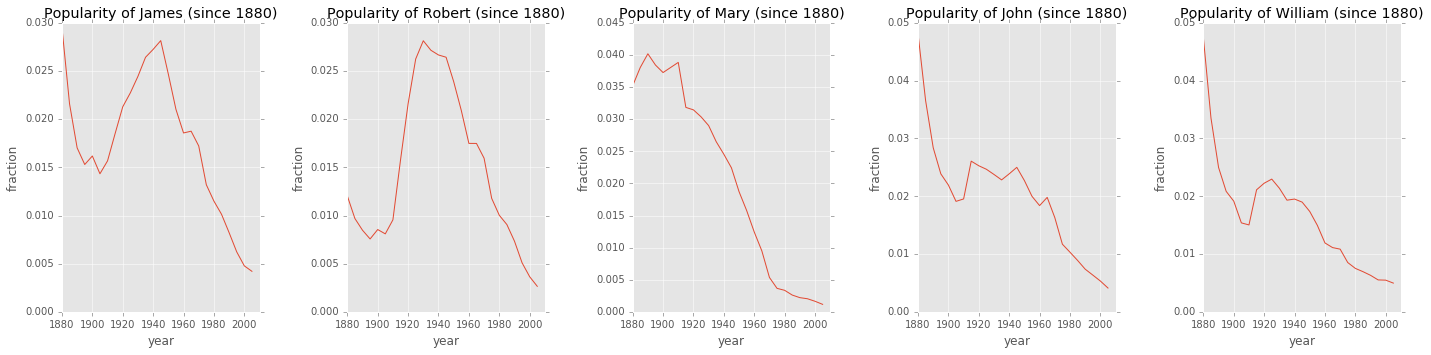

In [179]:
end_year = 2010
names = df[df['Year'] == start_year].groupby(['Name'])['Count'].sum().sort_values(ascending=False).head(n=5).index

def names_trends(start_year, names, diff):
    end_year = 2010
    years = xrange(start_year, end_year, diff)

    #for year in xrange(1880, 2020, 30):
        #top_10 = df[df['Year'] == year].groupby(['Name'])['Count'].sum().sort_values(ascending=False).head(n=10)

    fig = plt.figure(figsize=(20, 5))
    count = 1

    for name in names:
        ax = fig.add_subplot(1, 5, count)
        counts = []
        for year in years:
            pop = df[df['Year'] == year]['Count'].sum()
            counts.append(1. * df[df['Year'] == year][df['Name'] == name]['Count'].sum() / pop)

        counts = np.array(counts)

        ax.plot(years, counts)
        ax.set_xlabel('year')
        ax.set_ylabel('fraction')
        ax.set_xlim(start_year, 2010)
        ax.set_title('Popularity of %s (since %d)' % (name, years[0]))

        count = count + 1

    fig.tight_layout()
    
names_trends(1880, names, 5)


/Users/rankine/anaconda3/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


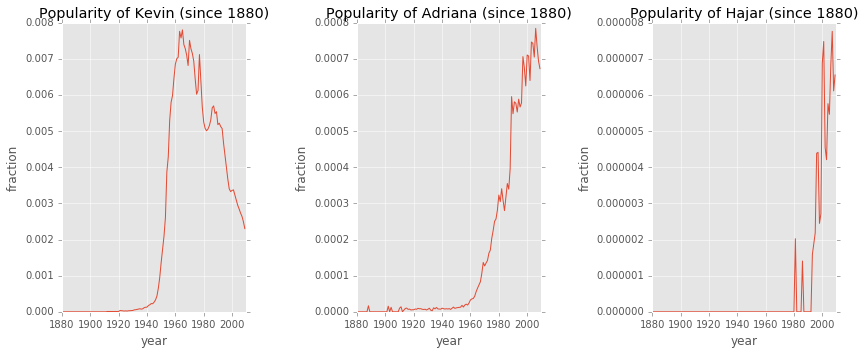

In [180]:
names_trends(1880, ['Kevin', 'Adriana', 'Hajar'], 1)

/Users/rankine/anaconda3/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


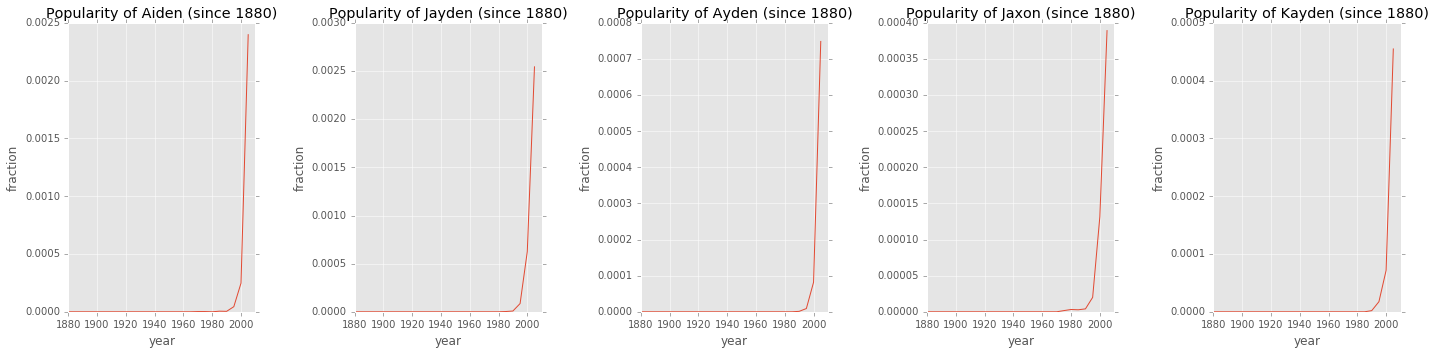

In [182]:
names_trends(1880, ['Aiden', 'Jayden', 'Ayden', 'Jaxon', 'Kayden'], 5)

/Users/rankine/anaconda3/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


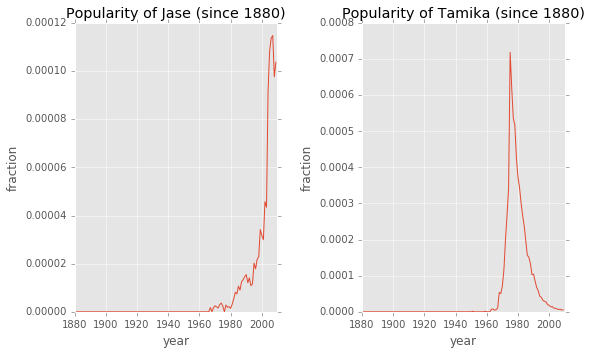

In [184]:
names_trends(1880, ['Jase', 'Tamika'], 1)

(1880, 2010)

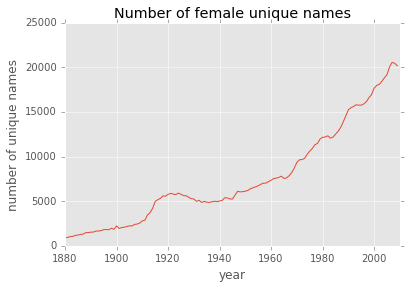

In [199]:
nums = []


for year in xrange(1880, 2010, 1):
    nums.append(len(df[(df['Year'] == year) & (df['Gender'] == 'F')]['Name'].drop_duplicates()))
    
plt.plot(xrange(1880, 2010, 1), nums)
plt.title('Number of female unique names')
plt.xlabel('year')
plt.ylabel('number of unique names')

plt.xlim(1880, 2010)



(130,)


(1880, 2010)

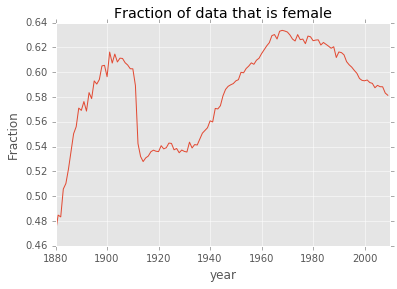

In [209]:
nums = []

for year in xrange(1880, 2010, 1):
    nums.append(1. * df[(df["Gender"] == 'F') & (df['Year'] == year)].shape[0] / df[df['Year'] == year].shape[0])
    
nums=np.array(nums)
    
print nums.shape
    
plt.plot(xrange(1880, 2010, 1), nums)
plt.title('Fraction of data that is female')
plt.xlabel('year')
plt.ylabel('Fraction')

plt.xlim(1880, 2010)